# Loading the dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import itertools

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
""
%matplotlib inline
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv("/content/drive/MyDrive/research/totaldata.csv")

In [ ]:
news.head()

,Unnamed: 0,articleID,content,headline,label
0,0,1,গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",1
1,1,2,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,1
2,2,3,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,1
3,3,4,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,1
4,4,5,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,1


In [ ]:
news['text'] = news['headline'] + " " + news['content']
news

,Unnamed: 0,articleID,content,headline,label,text
0,0,1,গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",1,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শো..."
1,1,2,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,1,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
2,2,3,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,1,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...
3,3,4,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,1,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...
4,4,5,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,1,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু মাদ...
...,...,...,...,...,...,...
11429,1429,142,এটিকে আর্মি অব ইসলাম বা ‘ইসলামি আর্মি’ নামে অভ...,৫৭টি মুসলিম দেশকে নিয়ে ইসলামি সেনাবাহিনী গঠন,0,৫৭টি মুসলিম দেশকে নিয়ে ইসলামি সেনাবাহিনী গঠন এ...
11430,1430,143,বিশ্ব মুসলিমদের প্রধান শত্রু ইহুদিবাদী সন্ত্রা...,ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি’,0,ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি...
11431,1431,144,ইসলামী মূল্যবোধের উন্নয়ন এবং ইসলামী সংস্কৃতি ব...,৫৬০ মডেল মসজিদ নির্মাণ করবে সরকার,0,৫৬০ মডেল মসজিদ নির্মাণ করবে সরকার ইসলামী মূল্য...
11432,1432,145,ভারতের বিনোদন জগতে গত কয়েক দিন সবচেয়ে উচ্চারিত...,রানুকে বাড়ি উপহার দিলেন সালমান,0,রানুকে বাড়ি উপহার দিলেন সালমান ভারতের বিনোদন জ...


In [ ]:
df=news.drop(["headline","Unnamed: 0","articleID", "content"],axis=1)

In [ ]:
df

,label,text
0,1,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শো..."
1,1,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
2,1,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...
3,1,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...
4,1,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু মাদ...
...,...,...
11429,0,৫৭টি মুসলিম দেশকে নিয়ে ইসলামি সেনাবাহিনী গঠন এ...
11430,0,ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি...
11431,0,৫৬০ মডেল মসজিদ নির্মাণ করবে সরকার ইসলামী মূল্য...
11432,0,রানুকে বাড়ি উপহার দিলেন সালমান ভারতের বিনোদন জ...


# data Preproccessing
We have to convert the raw messages (sequence of characters) into vectors (sequences of numbers).before that we need to do the following:
1. Remove punctuation
2. Remove numbers
3. Remove tags
4. Remove urls
5. Remove stepwords
6. Change the news to lower case
7. Lemmatisation 

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
import re

The following 4 functions will help as to remove punctions (<,.'':, etc),numbers,tags and urls

In [ ]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-0raw498p/banglakit-lemmatizer
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-0raw498p/banglakit-lemmatizer
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-cp37-none-any.whl size=117717 sha256=74fbe24750ec6b31ae92c7d9559948560113a2df4e789edd2d908b6433081b7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-o_5cjpf2/wheels/55/76/fb/67135871b310a3abeb998cd696c64d8e9c495f2f33ce2e2e59
Successfully built banglakit-lemmatizer


In [ ]:
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
#def rem_punctuation(text):
#  return text.translate(str.maketrans('','',string.punctuation))
#
#def rem_tags(text):
#  return re.sub('<.*?>'," ",text)


In [ ]:
#striping punctuations
puncList = ["।", "”", "“", "’"]
for p in string.punctuation.lstrip():
    puncList.append(p)

In [ ]:

#word tokenizer
def word_tokenize(doc):
    # remove punctuation
    tokens = []
    def cleanword(word):
        for p in puncList:
            word = word.replace(p, "")
        word = re.sub(r'[\u09E6-\u09EF]', "", word, re.DEBUG)  # replace digits

        return word

    for word in doc.split(" "):
        word = cleanword(word)
        if word != "":
            tokens.append(word)

    return tokens

In [ ]:
#df['text'].apply(rem_punctuation)

0        হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত ৬ জনকে শোক...
1        মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
2        প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...
3        মেডিয়েশনই মামলাজট নিরসনের পথ  বিচারপতি আহমেদ স...
4        টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু মাদ...
                               ...                        
11429    ৫৭টি মুসলিম দেশকে নিয়ে ইসলামি সেনাবাহিনী গঠন এ...
11430    ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি...
11431    ৫৬০ মডেল মসজিদ নির্মাণ করবে সরকার ইসলামী মূল্য...
11432    রানুকে বাড়ি উপহার দিলেন সালমান ভারতের বিনোদন জ...
11433    লেবুতেই ধ্বংস হবে করোনাভাইরাস রোনাভাইরাসের কোন...
Name: text, Length: 11434, dtype: object

In [ ]:
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

rem_stopwords() is the function for removing stopwords and for converting the words to lower case

In [ ]:
#def rem_stopwords(df_news):
    
#    #words = [ch for ch in df_news if ch not in stopWords]
#    #words= "".join(words).split()
#    df_news = remove_stopwords(df_news, stopwords)
#    return df_news

In [ ]:
import re
import string

# from nltk.corpus import stopwords

def clean_text(text):
    """Process text function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    lemmatizer = BengaliLemmatizer()
    # stopwords_english = stopwords.words('english')

    stopWords_Bangla= stopWords


    #text= re.sub('\[[^]]*\]', '', text)
    # remove stock market tickers like $GE
    #text = re.sub(r'\$\w*', '', text)
    #removal of html tags
    #review =re.sub(r'<.*?>',' ',text) 
    # remove old style retweet text "RT"
    #text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    #text = re.sub(r'#', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    text = re.sub('[\u09E6-\u09EF]',' ',text) 
    # text = text.lower()
    text_tokens =word_tokenize(text)

    text_clean = []
    for word in  text_tokens:
        if (word not in stopWords_Bangla and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            lem_word =lemmatizer.lemmatize(word)  # lemmitiging word
            text_clean.append(lem_word)
    text_mod=[i for i in text_clean if len(i)>2]
    text_clean=' '.join(text_mod)
    return  text_clean

In [ ]:
#df['text'].apply(rem_stopwords)
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [ ]:
df.clean_text

0        হট্টগোল বাকৃবিতে দুইজন বরখাস্ত শোকজ সেপ্টেম্বর...
1        মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
2        প্রেমের প্রস্তাবে রাজি হওয়ায় স্কুলছাত্রীকে কুপ...
3        মেডিয়েশনই মামলাজট নিরসনের বিচারপতি আহমেদ সোহেল...
4        টকশোতে জাপা নেতার মৃত্যু মাদারীপুর সদরের উপজেল...
                               ...                        
11429    মুসলিম দেশকে ইসলামি সেনাবাহিনী গঠন এটিকে আর্মি...
11430    ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি...
11431    মডেল মসজিদ নির্মাণ সরকার ইসলামী মূল্যবোধের উন্...
11432    রানুকে বাড়ি উপহার সালমান ভারতের বিনোদন জগতে সব...
11433    লেবুতেই ধ্বংস করোনাভাইরাস রোনাভাইরাসের প্রতিষে...
Name: clean_text, Length: 11434, dtype: object

* **Lemmatization** 
performs vocabulary and morphological analysis of the word and is normally aimed at removing **inflectional endings** only.That isconvert the words to their base or root form eg in "plays" it is converted to "play" by removing "s"

In [ ]:
#from nltk.stem import WordNetLemmatizer
#from banglakit.lemmatizer import BengaliLemmatizer
#nltk.download('wordnet')
#lemmatizer = BengaliLemmatizer()

#def lemmatize_words(text):
#  lemmas = []
#  for word in text.split():
#    lemmas.append(lemmatizer.lemmatize(word))
#  return " ".join(lemmas)

In [ ]:
#df['text'].apply(lemmatize_words)


0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire say As 21WIRE reported earli...
23477    21st Century Wire say It s a familiar theme. W...
23478    Patrick Henningsen 21st Century WireRemember w...
23479    21st Century Wire say Al Jazeera America will ...
23480    21st Century Wire say As 21WIRE predicted in i...
Name: text, Length: 44898, dtype: object

# Tokenizing & Padding

* **Tokenizing**
is the process of breaking down a text into words. Tokenization can happen on any character, however the most common way of tokenization is to do it on space character.

* **Padding**
Naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, for this we use padding

In [ ]:
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.utils import to_categorical


In [ ]:
x = df['clean_text'].values
y= df['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
x = tokenizer.texts_to_sequences(x)

In [ ]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 100

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x = pad_sequences(x, maxlen=max_length)

# Vectorization
 Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers 
 There are many  method for doing vectorization including  Bag of words,TFIDF or prettrained method such as Word2Vec ,Glove etc
 
 we are using **GloVe** learning algorithm for obtaining vector representations for words devolped by Stanford
 

In [ ]:
embeddings_index = {};
with open('/content/drive/MyDrive/research/bn_glove.39M.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

   
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          13347600  
_________________________________________________________________
lstm (LSTM)                  (None, 250, 64)           42240     
_________________________________________________________________
dropout (Dropout)            (None, 250, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [ ]:
epochs = 10
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
63/63 [==============================] - 42s 604ms/step - loss: 0.3618 - accuracy: 0.8559 - val_loss: 0.2510 - val_accuracy: 0.9015
Epoch 2/10
63/63 [==============================] - 37s 593ms/step - loss: 0.2372 - accuracy: 0.9060 - val_loss: 0.2058 - val_accuracy: 0.9260
Epoch 3/10
63/63 [==============================] - 37s 594ms/step - loss: 0.2099 - accuracy: 0.9197 - val_loss: 0.1914 - val_accuracy: 0.9309
Epoch 4/10
63/63 [==============================] - 37s 588ms/step - loss: 0.1879 - accuracy: 0.9323 - val_loss: 0.1816 - val_accuracy: 0.9338
Epoch 5/10
63/63 [==============================] - 37s 593ms/step - loss: 0.1802 - accuracy: 0.9334 - val_loss: 0.1608 - val_accuracy: 0.9432
Epoch 6/10
63/63 [==============================] - 37s 590ms/step - loss: 0.1582 - accuracy: 0.9416 - val_loss: 0.1568 - val_accuracy: 0.9455
Epoch 7/10
63/63 [==============================] - 37s 588ms/step - loss: 0.1461 - accuracy: 0.9470 - val_loss: 0.1541 - val_accuracy: 0.9449

In [ ]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

108/108 [==============================] - 6s 57ms/step - loss: 0.1554 - accuracy: 0.9449
[+] Accuracy: 94.49%


In [ ]:
pred = model.predict(X_test)
predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [ ]:
print('Accuracy on testing set:', accuracy_score(predictions, y_test))
print('Precision on testing set:', precision_score(predictions, y_test))
print('Recall on testing set:', recall_score(predictions, y_test))
print('Classification Report: \n', classification_report(predictions, y_test))

Accuracy on testing set: 0.9449140192363742
Precision on testing set: 0.9867241951543312
Recall on testing set: 0.9522741832158873
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.87      0.74       309
           1       0.99      0.95      0.97      3122

    accuracy                           0.94      3431
   macro avg       0.82      0.91      0.85      3431
weighted avg       0.96      0.94      0.95      3431



In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix', cmap = plt.cm.Greens):
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized CM")
    else:
        print("CM not normalized")
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(predictions, y_test)

CM not normalized


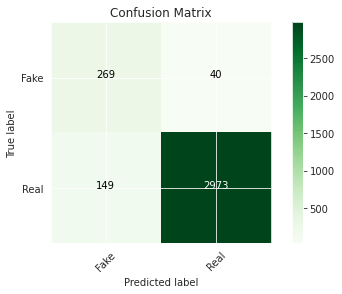

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(cm,classes = ['Fake','Real'])